# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# EDA + Feature Processing

EDA 및 Feature Processing을 진행하고, 활용할 Feature들을 확정합니다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [3]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### 담당 파트:  EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
>- EnvironmentSatisfaction, JobSatisfaction 이 두개가 비교적 큰 퇴사요인이 됨.\
 -- years를 보면, 퇴사자들중 상당수가 입사하고 얼마안있다가 퇴사해버림> 요인을 파악하고 대책이 필요할듯 

## EnvironmentSatisfaction

In [4]:
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

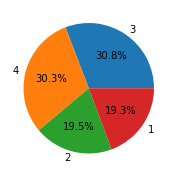

In [5]:
plt.figure(figsize=(3,3))
plt.pie(data['EnvironmentSatisfaction'].value_counts(), labels=data['EnvironmentSatisfaction'].value_counts().index,autopct='%0.1f%%')
plt.show()
#1: 'Low'    2: 'Medium'  3: 'High'   4: 'Very High'

In [6]:
data[['Attrition','EnvironmentSatisfaction']].groupby('Attrition').mean()

,EnvironmentSatisfaction
Attrition,
No,2.771290
Yes,2.464135


In [7]:
data.groupby(['EnvironmentSatisfaction','Attrition'])['Attrition'].count()

EnvironmentSatisfaction  Attrition
1                        No           212
                         Yes           72
2                        No           244
                         Yes           43
3                        No           391
                         Yes           62
4                        No           386
                         Yes           60
Name: Attrition, dtype: int64

In [8]:
pd.crosstab([data.EnvironmentSatisfaction],[data.Attrition],
                            margins=True).style.background_gradient(cmap='summer_r')

Attrition,No,Yes,All
EnvironmentSatisfaction,,,
1,212,72,284
2,244,43,287
3,391,62,453
4,386,60,446
All,1233,237,1470


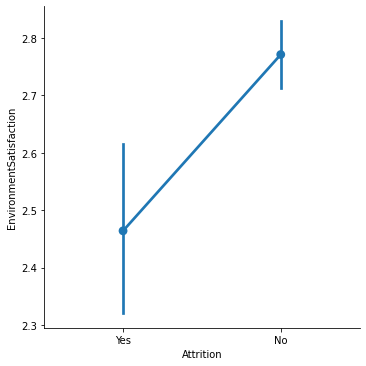

In [9]:
sns.factorplot('Attrition','EnvironmentSatisfaction',data=data)

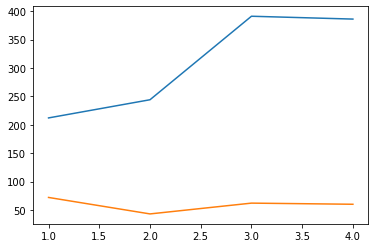

In [10]:
att_yes_e_s=data[data['Attrition']=='Yes'].groupby('EnvironmentSatisfaction').count()[['Attrition']]
att_no_e_s=data[data['Attrition']=='No'].groupby('EnvironmentSatisfaction').count()[['Attrition']]
display(plt.plot(att_no_e_s['Attrition']))
display(plt.plot(att_yes_e_s['Attrition']))

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

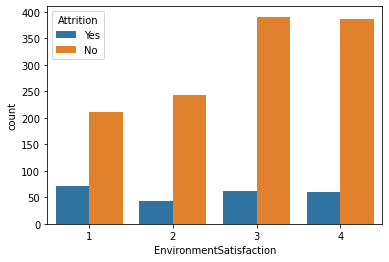

In [11]:
sns.countplot(data['EnvironmentSatisfaction'], hue='Attrition', data=data,dodge = True) 

- 환경만족도를 낮게 준 사람들이 주로 퇴사했고, 환경에 만족한 사람들은 퇴사를 하지 않는 경향이 크다. 

## JobSatisfaction

In [12]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

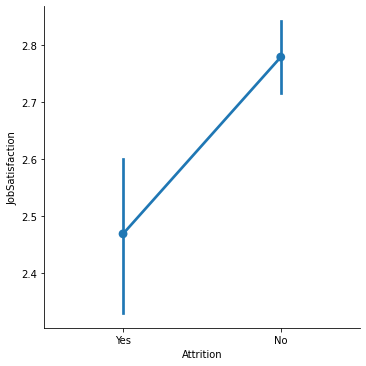

In [13]:
sns.factorplot('Attrition','JobSatisfaction',data=data)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

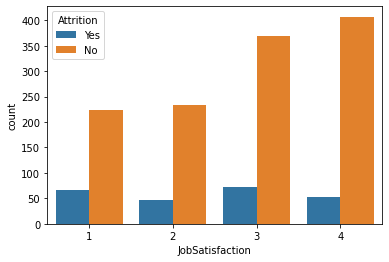

In [14]:
sns.countplot(data['JobSatisfaction'], hue='Attrition', data=data,dodge = True) 

- 마찬가지로 JobSatisfaction이 높은 사람들이 퇴사율이 적다.

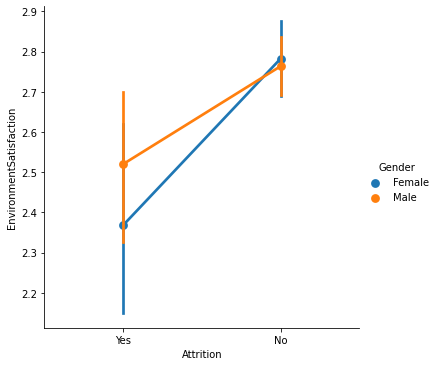

In [82]:
sns.factorplot('Attrition','EnvironmentSatisfaction',data=data, hue='Gender')

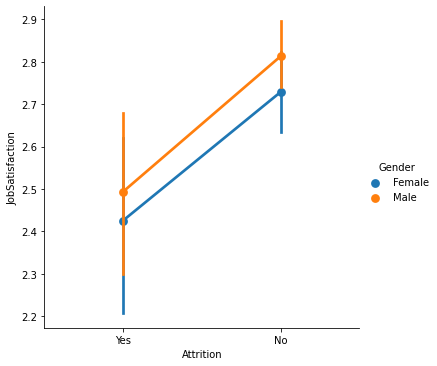

In [83]:
sns.factorplot('Attrition','JobSatisfaction',data=data, hue='Gender')

## RelationshipSatisfaction

In [51]:
data['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

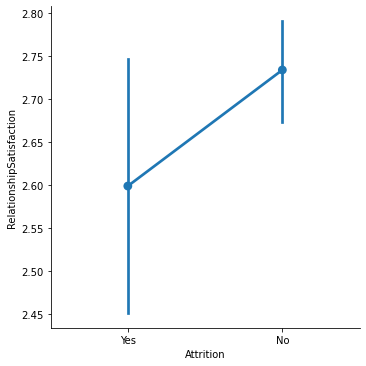

In [52]:
sns.factorplot('Attrition','RelationshipSatisfaction',data=data)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

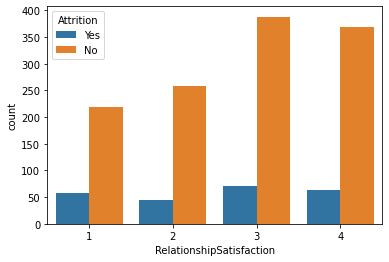

In [53]:
sns.countplot(data['RelationshipSatisfaction'], hue='Attrition', data=data,dodge = True)

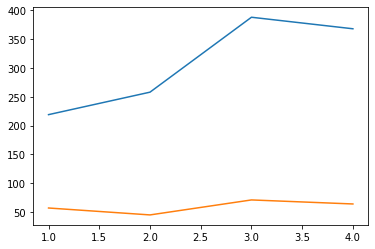

In [54]:
att_yes_r_s=data[data['Attrition']=='Yes'].groupby('RelationshipSatisfaction').count()[['Attrition']]
att_no_r_s=data[data['Attrition']=='No'].groupby('RelationshipSatisfaction').count()[['Attrition']]
display(plt.plot(att_no_r_s['Attrition']))
display(plt.plot(att_yes_r_s['Attrition']))

In [55]:
att_yes_r_s

,Attrition
RelationshipSatisfaction,
1,57
2,45
3,71
4,64


- RelationshipSatisfaction이 높으면 퇴사를 덜하는 것 같긴 하지만,\
RelationshipSatisfaction이 낮다고 해서 퇴사를 덜하는 것은 아닌 것 같다

## WorkLifeBalance

In [56]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

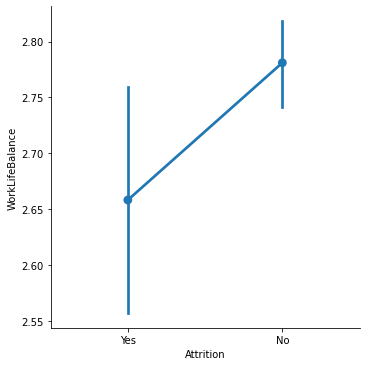

In [57]:
sns.factorplot('Attrition','WorkLifeBalance',data=data)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

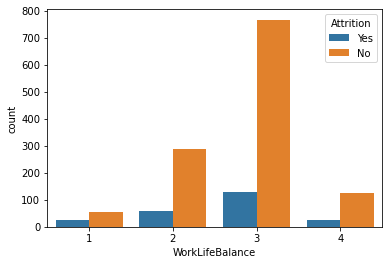

In [58]:
sns.countplot(data['WorkLifeBalance'], hue='Attrition', data=data,dodge = True)

In [59]:
pd.crosstab([data.WorkLifeBalance],[data.Attrition],
                            margins=True).style.background_gradient(cmap='summer_r')

Attrition,No,Yes,All
WorkLifeBalance,,,
1,55,25,80
2,286,58,344
3,766,127,893
4,126,27,153
All,1233,237,1470


In [60]:
#워라밸 만족도별 퇴사자/전체수
data[data['Attrition']=='Yes'].groupby('WorkLifeBalance').count()['Attrition']/data.groupby('WorkLifeBalance').count()['Attrition']

WorkLifeBalance
1    0.312500
2    0.168605
3    0.142217
4    0.176471
Name: Attrition, dtype: float64

In [61]:
workandlife_df=data[data['WorkLifeBalance']<5].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['1점']=data[data['WorkLifeBalance']==1].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['2점']=data[data['WorkLifeBalance']==2].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['3점']=data[data['WorkLifeBalance']==3].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df['4점']=data[data['WorkLifeBalance']==4].groupby('Attrition').sum()[['WorkLifeBalance']]
workandlife_df

,WorkLifeBalance,1점,2점,3점,4점
Attrition,,,,,
No,3429,55,572,2298,504
Yes,630,25,116,381,108


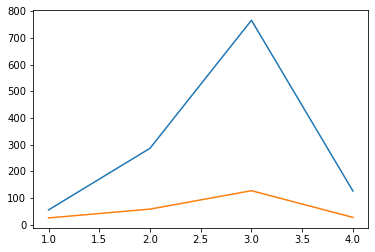

In [62]:
att_yes_Lb_s=data[data['Attrition']=='Yes'].groupby('WorkLifeBalance').count()[['Attrition']]
att_no_Lb_s=data[data['Attrition']=='No'].groupby('WorkLifeBalance').count()[['Attrition']]
display(plt.plot(att_no_Lb_s['Attrition'])) #재직자
display(plt.plot(att_yes_Lb_s['Attrition'])) #퇴사자

- 워라밸 만족도가 낮은 1의 경우 퇴사율이 높은 것은 맞지만,
워라밸이 높다고 해서 퇴사를 안하는 건 아닌 것 같음..!\
퇴사자 630명 중에 489명이 워래밸에 3 또는 4점을 줌.

## YearsAtCompany

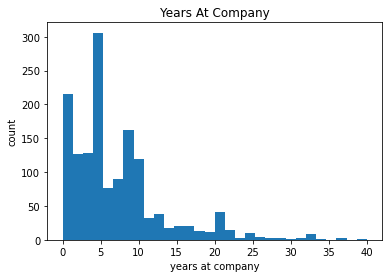

In [63]:
plt.hist(data['YearsAtCompany'],bins=30)
plt.xlabel('years at company')
plt.ylabel('count')
plt.title('Years At Company')
plt.show()

(array([140., 208., 266., 146., 145., 132.,  14.,  38.,  30.,  20.,  36.,
         27.,   6.,   4.,   6.,   2.,   3.,   6.,   1.,   3.]),
 array([ 0.  ,  1.85,  3.7 ,  5.55,  7.4 ,  9.25, 11.1 , 12.95, 14.8 ,
        16.65, 18.5 , 20.35, 22.2 , 24.05, 25.9 , 27.75, 29.6 , 31.45,
        33.3 , 35.15, 37.  ]),
 <BarContainer object of 20 artists>)

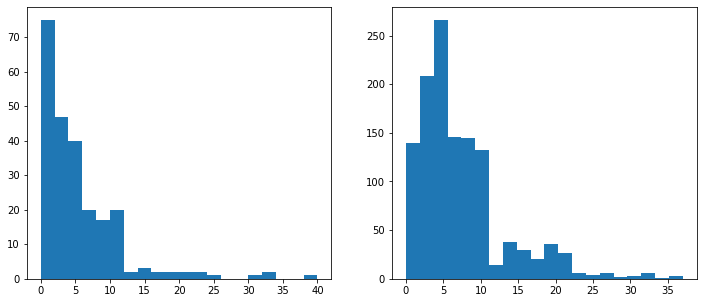

In [64]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']=='Yes'][['YearsAtCompany']],bins=20)
axes[1].hist(data[data['Attrition']=='No'][['YearsAtCompany']],bins=20)

In [65]:
print('퇴사O의 평균 근무기간 : ',data[data['Attrition']=='Yes'][['YearsAtCompany']].mean())
print('퇴사X의 평균 근무기간 : ',data[data['Attrition']=='No'][['YearsAtCompany']].mean())

퇴사O의 평균 근무기간 :  YearsAtCompany    5.130802
dtype: float64
퇴사X의 평균 근무기간 :  YearsAtCompany    7.369019
dtype: float64


퇴사자들의 평균 근무기간이 퇴사하지 않는 사람들보다 약 2년정도 적다.
5년이내 퇴사자수가 가장 많은데, 회사랑 맞지 않으면 바로 나가버리는 듯.

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

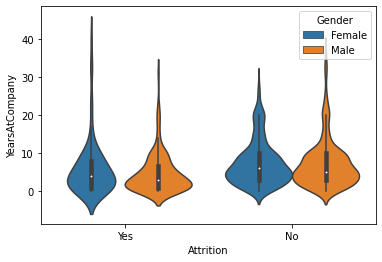

In [66]:
sns.violinplot(data=data, x=data['Attrition'] ,y=data['YearsAtCompany'],hue='Gender')

## YearsInCurrentRole

(array([301., 507., 140., 259.,  89.,  96.,  32.,  25.,  15.,   6.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

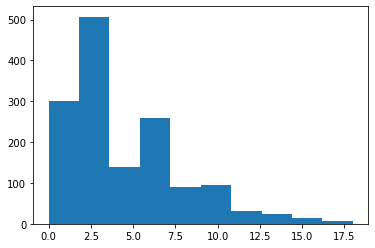

In [67]:
plt.hist(data['YearsInCurrentRole'])

(array([171.,  46., 304., 119.,  89.,  35.,  35., 191.,  82.,   0.,  61.,
         27.,  22.,   9.,  13.,  10.,   6.,   7.,   4.,   2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <BarContainer object of 20 artists>)

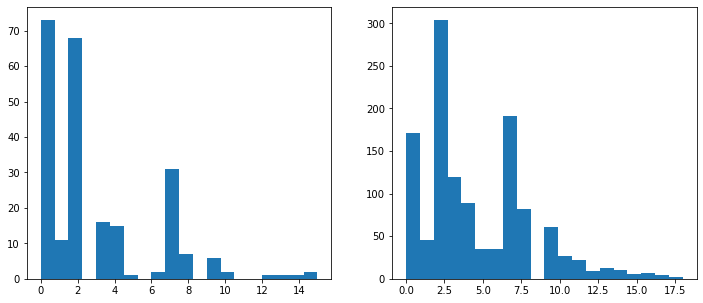

In [68]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']=='Yes'][['YearsInCurrentRole']],bins=20)
axes[1].hist(data[data['Attrition']=='No'][['YearsInCurrentRole']],bins=20)

In [69]:
print('퇴사O의 평균 현재업무지속기간 : ',data[data['Attrition']=='Yes'][['YearsInCurrentRole']].mean())
print('퇴사X의 평균 현재업무지속기간 : ',data[data['Attrition']=='No'][['YearsInCurrentRole']].mean())

퇴사O의 평균 현재업무지속기간 :  YearsInCurrentRole    2.902954
dtype: float64
퇴사X의 평균 현재업무지속기간 :  YearsInCurrentRole    4.484185
dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

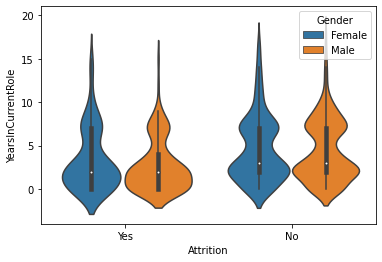

In [70]:
sns.violinplot(data=data, x=data['Attrition'] ,y=data['YearsInCurrentRole'],hue='Gender')

별 필요없는듯..

## YearsSinceLastPromotion

(array([938., 159., 113.,  45., 108.,  18.,  23.,  24.,  20.,  22.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

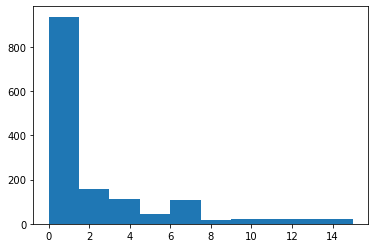

In [71]:
plt.hist(data['YearsSinceLastPromotion'])

(array([471., 308., 132.,  43.,  56.,  43.,  26.,  60.,  18.,  13.,   5.,
         22.,  10.,   8.,  18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

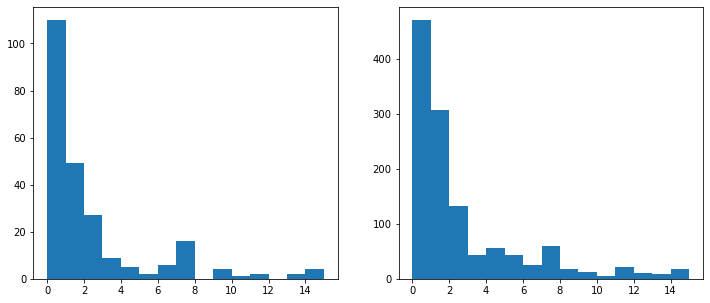

In [72]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']=='Yes'][['YearsSinceLastPromotion']],bins=15)
axes[1].hist(data[data['Attrition']=='No'][['YearsSinceLastPromotion']],bins=15)

In [73]:
print('퇴사O의 평균 마지막승진으로부터의 기간 : ',data[data['Attrition']=='Yes'][['YearsSinceLastPromotion']].mean())
print('퇴사X의 평균 마지막승진으로부터의 기간 : ',data[data['Attrition']=='No'][['YearsSinceLastPromotion']].mean())

퇴사O의 평균 마지막승진으로부터의 기간 :  YearsSinceLastPromotion    1.945148
dtype: float64
퇴사X의 평균 마지막승진으로부터의 기간 :  YearsSinceLastPromotion    2.234388
dtype: float64


마지막 승진으로부터의 기간과 퇴사는 큰 관계가 없다고 보임.

## YearsWithCurrManager

(array([339., 486., 129.,  29., 323.,  91.,  22.,  32.,  10.,   9.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

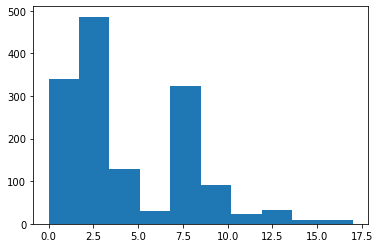

In [74]:
plt.hist(data['YearsWithCurrManager'])

(array([243., 294., 123.,  87.,  27.,  25., 185., 155.,  24.,  21.,  18.,
         14.,   3.,   5.,   9.]),
 array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
         5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
        11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
        17.        ]),
 <BarContainer object of 15 artists>)

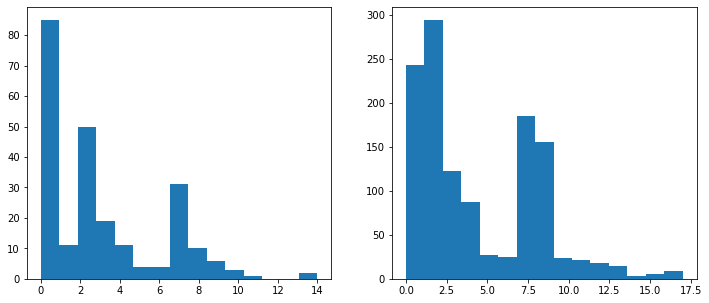

In [75]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12,5)
axes[0].hist(data[data['Attrition']=='Yes'][['YearsWithCurrManager']],bins=15)
axes[1].hist(data[data['Attrition']=='No'][['YearsWithCurrManager']],bins=15)

In [76]:
print('퇴사O의 평균 현재매니저와 일한 기간 : ',data[data['Attrition']=='Yes'][['YearsWithCurrManager']].mean())
print('퇴사X의 평균 현재매니저와 일한 기간 : ',data[data['Attrition']=='No'][['YearsWithCurrManager']].mean())

퇴사O의 평균 현재매니저와 일한 기간 :  YearsWithCurrManager    2.852321
dtype: float64
퇴사X의 평균 현재매니저와 일한 기간 :  YearsWithCurrManager    4.367397
dtype: float64


밑에 heatmap에서 보면, 현재매니저와 일한 기간은 years at company와 0.62로 비교적 높은 상관관계가 있는 것으로 보인다.

In [80]:
years_df=data[['Attrition','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

<AxesSubplot:>

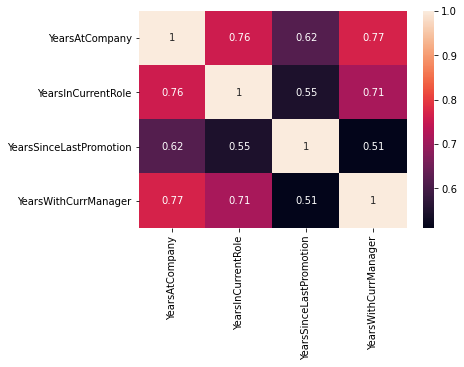

In [78]:
sns.heatmap(years_df.corr(),annot=True)

값이 0.7이상인 것을 뚜렷한 양적 상관관계가 있다고 볼때,
years at company, yearn in curren role, years with curren mannager
이 세가지 항목은 다중공선성이 나타난다고 볼 수 있다?!